## Import


In [30]:
# Use this cell to regroup all your imports

## Classic Import
import pandas as pd
#pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math
from scipy import stats
from time import time
import random

# Widgets import
from ipywidgets import interact
import ipywidgets as widgets
from sklearn.datasets import make_blobs


# SKlearn model Import
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor

#Trees and boosting import 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#Unsupervised cluster model
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


#Curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#Scaler import
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import get_scorer_names

#Pipeline import
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer
import pickle

#Encoding import
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

#Permutation import
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#subtests import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import max_error

#Deeplearning import
import tensorflow.keras
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import optimizers
from tensorflow.keras.backend import expand_dims
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.applications import vgg16 # VGG16 model
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Masking


#from sklearn import set_config; set_config(display='diagram')


# Deep Learning challenge

This challenge is split into 2 independent parts:
1. CNN challenge - Face to Age
2. RNN challenge - Sentiment Analysis of Movies Reviews

## 1. CNN challenge - Face to Age

### Objectives
-  Visualize images
-  Preprocess images for Neural Networks
-  Fit a custom CNN for a regression task
-  Fine-tune an analyse model performance

### 1.1 Visualize images

**👉 Load the dataset (200 Mo)**

In [4]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification/face_to_age/images.csv")
data = data.sample(frac=1, random_state=0).reset_index(drop=True)
data

,age,pixels
0,45,200 168 96 107 123 132 132 135 135 134 134 137...
1,1,223 226 231 234 236 238 238 240 240 240 240 23...
2,35,23 29 24 29 47 71 110 141 166 169 169 174 179 ...
3,28,9 6 11 12 30 65 82 37 47 16 27 26 32 74 141 16...
4,24,67 66 63 59 61 62 60 66 83 103 139 173 192 194...
...,...,...
23700,35,48 47 52 66 78 89 96 104 117 127 139 142 149 1...
23701,55,101 107 110 114 118 120 127 129 132 137 139 14...
23702,28,161 134 113 114 98 93 92 90 82 58 23 45 85 105...
23703,3,65 82 84 129 141 116 43 46 54 71 58 60 64 66 7...


In [8]:
data.dtypes

age        int64
pixels    object
dtype: object

In [9]:
data.shape

(23705, 2)

In [12]:
df = data.copy()

Each row represent the image of a face in black and white
- `age` is the age in year
- `pixels` contains the 2304 (= 48 * 48) flatten values of each pixel in the image, in a black scale from 0 to 255, stored as string

**❓ Plot the histogram of age in your dataset.**

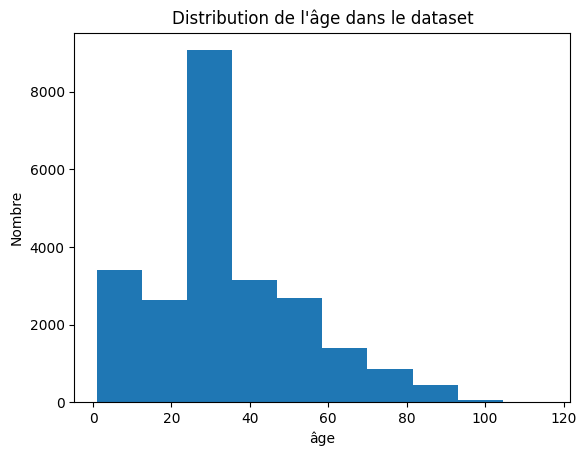

In [11]:
plt.hist(data['age']);
plt.title("Distribution de l'âge dans le dataset")
plt.xlabel('âge')
plt.ylabel('Nombre');

**❓ Visually display one image of your choice.**

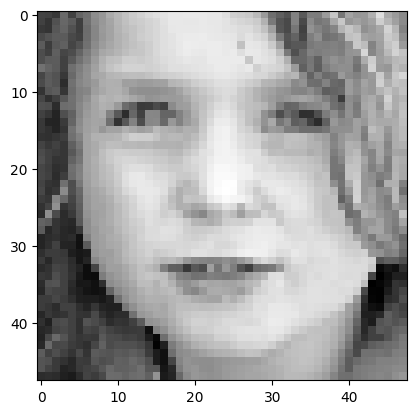

In [37]:
#Select one random img (rerun the cell if you don't like the img)
img_pix = df.loc[random.randint(1,len(df)), 'pixels']

img_ = []

for i in img_pix.split(' '):
    img_.append(int(i))


#Conversion en array pour reshape
img_ = np.array(img_)

#Reshape pour être au bon format
plt.imshow(img_.reshape(48,48), cmap='gray');

**❓ What is the physical characteristic of the image at _index_ `60`?**

- Store in the 3 boolean variables `smile`/`glasses`/`hat` the values `True` if the person smiles/wears glasses/has a hat, `False` else.

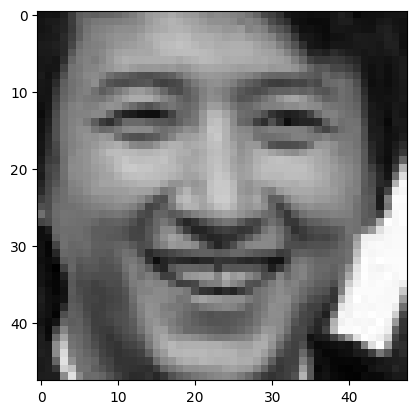

In [42]:
#Select img 60
img_pix = df.loc[60, 'pixels']

img_ = []

for i in img_pix.split(' '):
    img_.append(int(i))

img_ = np.array(img_)

plt.imshow(img_.reshape(48,48), cmap='gray');

In [28]:
# Store your result in the variable below

smile = True
glasses = False
hat = False

#### 💾 Save your results

Run the cell below to save your results.

In [38]:
from nbresult import ChallengeResult
result = ChallengeResult('images_visualization',
                         smile=smile,
                         glasses=glasses,
                         hat=hat)
result.write()

### 1.2 Processing

**❓ Your goal is to train a convolutional neural network model to predict the _age_ of a person based solely on a picture of his/her face.**
- Create your **feature matrix** `X` as `ndarray` scaled between 0 and 1
- Create your **target vector** `y` as `ndarray`
- Create your holdout sets: 4 variables (`X_train`, `y_train`) and (`X_test`, `y_test`) keeping the **first** `70%` as the train set
- `X` and `y` shapes should fit a CNN (`model.fit(X,y)`)

😌 Don't worry, you will be given the solution in the next question in case you don't make it

*On veut réutiliser la méthode plus haut mais pour tous le dataframe et le store dans X.*

*Pour y, il suffit de prendre la variable 'âge'.*

*Pour le train/test, on peut utiliser le module de SKlearn 'TrainTestSplit' ou le faire manuellement.*

In [44]:
#Création du X

def pix_to_img(X):
    #On réutilise la méthode vue plus haut
    list_ = []
    
    #Séparation des RGB
    [list_.append(int(i)) for i in X.split(' ')]
    
    #Conversion en np.array
    list_ = np.array(list_)
    
    #Reshape en (48,48)
    list_ = list_.reshape(48,48)
    
    #Normalisation des pixels
    list_ = list_ / 255
    
    return np.expand_dims(list_ , axis=2)

X = [pix_to_img(row['pixels']) for _, row in df.iterrows()]
X = np.array(X)

In [47]:
# Notre X semble avoir les bonnes dimensions et format
print(X.shape)
print(type(X))

(23705, 48, 48, 1)
<class 'numpy.ndarray'>


In [49]:
#Création du y 

#On ne récupère que les valeurs de la pd.Series âge pour avoir un np.ndarray
y = df['age'].values

In [51]:
#Notre y semble également avoir les bonnes shapes

print(y.shape)
print(type(y))

(23705,)
<class 'numpy.ndarray'>


**Création du traintestsplit 70/30**

In [64]:
#Manuellement

#len(X)*0.7 #--> 16593
#len(X)*0.3 # --> 7112
#16594 + 7111 --> 23705 ==> dim

# X_train = X[:16593]
# y_train = y[:16593]
# X_test = X[16593:]
# y_test = y[16593:]

In [66]:
#Avec SKlearn

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16593, 48, 48, 1) (7112, 48, 48, 1) (16593,) (7112,)


#### 💾 Save your results

Run the cell below to save your results.

In [67]:
from nbresult import ChallengeResult
result = ChallengeResult('images_processing', 
                         X_train_shape = X_train.shape,
                         y_train_shape = y_train.shape,
                         first_image = X_train[0]
                        )
result.write()

### 1.3 Modeling the age of a face

👉 **Only if you haven't managed to create your training sets above**, you can start back from the solution by running the cell below 
- ⚠️ This will download ~500Mo of `.pickle` files on your current working directory
- Then it will load them into 4 ndarrays in memory, and it should delete initial .pickles from your disk

In [222]:
import pickle

def download_solutions():
    file_names = ["images_X_train.pickle", "images_X_test.pickle", "images_y_train.pickle", "images_y_test.pickle"]
    base_url = "https://wagon-public-datasets.s3.amazonaws.com/certification/face_to_age/"
    pickles = dict()

    for file_name in file_names:
        url = f"{base_url + file_name}"
        file_path = f"data/images/{file_name}"
        command = f"curl --output {file_path} {url}"
        ! eval {command}
        with open(file_path, 'rb') as handle:
            pickles[file_name] = pickle.load(handle)
        command = f"rm {file_path}"
        ! eval {command}
        
    return pickles

# UNCOMMENT THIS LINE BELOW TO GET THE CORRECTION IF NEEDED
X_train, X_test, y_train, y_test = download_solutions().values()

❓ **Before training a complex model, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "naive" case where you always predict mean age
- Store the result under `score_baseline`

In [74]:
#Ici, on va avoir la moyenne de notre y_train puis calculer la mae en adaptant le format de notre y_naif

#Calcul de la moyenne de y_train

mean_y_naif = np.mean(y_train) #--> 33.21099258723558

#On crée ensuite un np.array de la même shape que notre y_pred

y_baseline = np.array([mean_y_naif] * 7112)

#y_baseline.shape --> (7112,)

#On calcule la mae

score_baseline= mean_absolute_error(y_test, y_baseline)

print(score_baseline)

15.31697046954287


❓ **Build and fit a convolutional neural network**

- Name it `model`
- Store output of `.fit()` in a variable `history`
- Do not use transfer learning
- Make sure your model does not overfit with appropriate control techniques

💡 Manage wisely your training time. You should obtain significantly better performance than the baseline in less than 5 minutes with average processor and no graphic cards. 

In [76]:
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1, activation='linear'))

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [78]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

es = EarlyStopping(patience=5, restore_best_weights=True)

In [79]:
history = model.fit(
    X_train, y_train,
    validation_split=0.3,
    epochs=200,
    batch_size=32,
    callbacks=[es]
)

2022-12-23 10:32:46.824473: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 107043840 exceeds 10% of free system memory.


Epoch 1/200
363/363 [==============================] - 35s 92ms/step - loss: 371.0179 - mae: 14.7696 - val_loss: 248.3244 - val_mae: 12.6763
Epoch 2/200
363/363 [==============================] - 35s 96ms/step - loss: 228.4133 - mae: 11.4212 - val_loss: 186.3326 - val_mae: 10.1360
Epoch 3/200
363/363 [==============================] - 36s 98ms/step - loss: 193.2867 - mae: 10.3320 - val_loss: 164.5337 - val_mae: 9.5234
Epoch 4/200
363/363 [==============================] - 36s 98ms/step - loss: 168.0548 - mae: 9.4892 - val_loss: 148.9122 - val_mae: 8.7813
Epoch 5/200
363/363 [==============================] - 39s 108ms/step - loss: 156.2928 - mae: 9.1264 - val_loss: 133.4359 - val_mae: 8.4439
Epoch 6/200
363/363 [==============================] - 35s 97ms/step - loss: 139.2370 - mae: 8.5610 - val_loss: 127.7182 - val_mae: 8.4057
Epoch 7/200
363/363 [==============================] - 36s 100ms/step - loss: 131.1189 - mae: 8.3116 - val_loss: 120.2865 - val_mae: 7.8914
Epoch 8/200
363/363 

❓ **Plot your training and validation MAE at each epoch using the cell below**

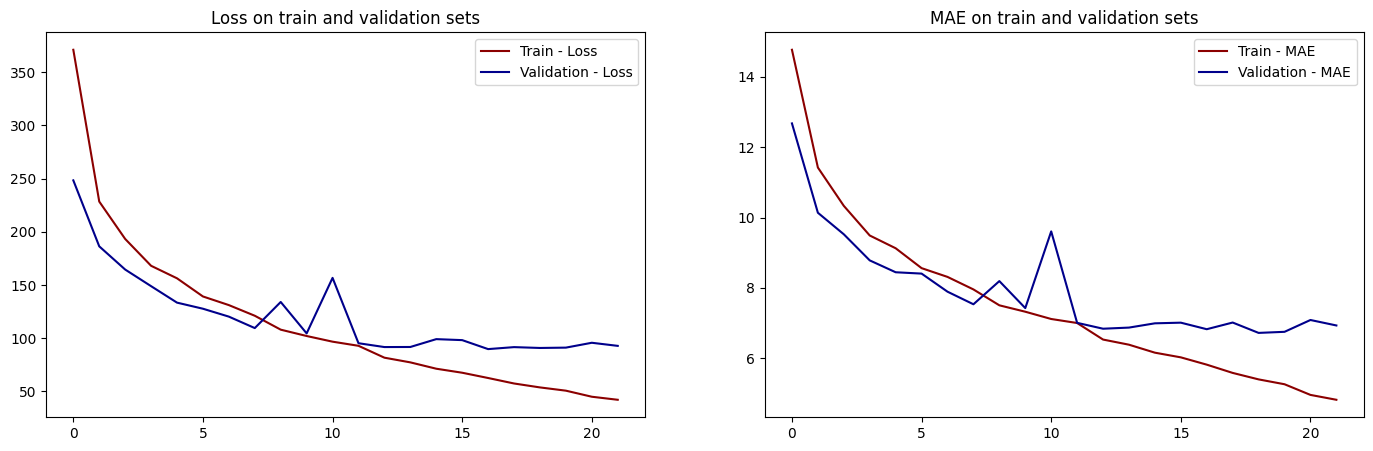

In [80]:
# Plot below your train/val loss history (merci Le Wagon)

def plot_history(history):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (17, 5))
    
    axes[0].plot(history.history['loss'], color = 'darkred', label = 'Train - Loss')
    axes[0].plot(history.history['val_loss'], color = 'darkblue', label = 'Validation - Loss')
    axes[0].legend()
    axes[0].set_title('Loss on train and validation sets')    
    
    axes[1].plot(history.history['mae'], color = 'darkred', label = 'Train - MAE')
    axes[1].plot(history.history['val_mae'], color = 'darkblue', label = 'Validation - MAE')
    axes[1].legend()
    axes[1].set_title('MAE on train and validation sets')


plot_history(history)

# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
fig.savefig("tests/history.png")

Pas le temps de réduire les épochs et de relancer :///

On a un début d'overfitting vers 12 epochs (Train continue de baisser alors que val se stabilise)

On aurait pu rajouter :

    - une régularisation
    
    - faire un optimizer custom (modification du learning rate, ...)

❓ **Evaluate your performances on test set**
- Store your test score as `score_test`

In [81]:
score_test = model.evaluate(X_test,y_test)

score_test

223/223 [==============================] - 4s 19ms/step - loss: 92.2292 - mae: 6.9079


[92.22920227050781, 6.907858848571777]

#### 💾 Save your results

Run the cell below to save your results.

In [82]:
from nbresult import ChallengeResult
import tensorflow as tf

result = ChallengeResult(
    "cnn",
    input_shape = list(model.input.shape),
    output_shape = list(model.output.shape),
    layer_names = [layer.name for layer in model.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in model.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()

## 2. RNN challenge - Binary Sentiment Analysis of French Movie Reviews

### 2.1 Data Preparation (given)

Our dataset contains 30,000 french reviews of movies, along with the binary class 1 (positive) or 0 (negative) score

In [83]:
# We load the dataset for you
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/certification/movies_reviews/movies_reviews.csv')
data.head()

,review,polarity
0,Ça commence à devenir énervant d'avoir l'impre...,0
1,"J'ai aimé ce film, si il ressemble a un docume...",1
2,Une grosse merde ce haneke ce faire produire p...,0
3,"Beau mélodrame magnifiquement photographié, ""V...",1
4,A la poursuite du diamant vers est un film pro...,1


In [84]:
# We create features
y = data.polarity
X = data.review

# We analyse class balance
print(pd.value_counts(y))

1    15051
0    14900
Name: polarity, dtype: int64


In [85]:
# We check the first review
print(f'polarity: {y[0]} \n')
print(X[0])

polarity: 0 

Ça commence à devenir énervant d'avoir l'impression de voir et revoir le même genre de film à savoir : la comédie romantique, surement le genre le plus prolifique de le production française actuelle. Le problème c'est que l'on a souvent affaire à des niaiseries de faible niveau comme celui ci. Avec un scenario ultra balisé et conventionnel, c'est à se demander comment ça peut passer les portes d'un producteur. Bref cette sempiternel histoire d'un homme mentant au nom de l'amour pour reconquérir une femme et qui à la fin se prend son mensonge en pleine figure est d'une originalité affligeante, et ce n'est pas la présence au casting de l'ex miss météo Charlotte Le Bon qui rêve surement d'avoir la même carrière que Louise Bourgoin qui change la donne.


#### Text Cleaning

We performed the following data cleaning for you:
- We replaced french accents by their non-accentuated equivalent
- We reduced all uppercases to lowercases
- We removed any characters outside of a-z

Below you can visualize the cleaned dataset:

In [86]:
X_clean = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification/movies_reviews/movies_reviews_clean.csv")['review']
X_clean[0]

'ca commence a devenir enervant de voir et revoir le meme genre de film a savoir la comedie romantique surement le genre le plus prolifique de le production francaise actuelle le probleme que a souvent affaire a des niaiseries de faible niveau comme celui ci avec un scenario ultra balise et conventionnel a se demander comment ca peut passer les portes producteur bref cette sempiternel histoire homme mentant au nom de pour reconquerir une femme et qui a la fin se prend son mensonge en pleine figure est originalite affligeante et ce pas la presence au casting de miss meteo charlotte le bon qui reve surement la meme carriere que louise bourgoin qui change la donne'

#### Text preprocessing

Then we performed the following preprocessing for you:
- We converted each review into a list of integers, each integer representing a _unique_ word from the corpus

- We padded every sequences with a maximum length of 100, replacing missing words by `0` at the end

- For example, the sentence: `"this was good"` is converted into something like `array([1, 3, 18, 0, 0, 0, ...0], dtype=int32)` 

Below you can visualize the preprocessed dataset:

In [87]:
!curl 'https://wagon-public-datasets.s3.amazonaws.com/certification/movies_reviews/movies_reviews_preproc.csv' --output "data/movies_reviews_preproc.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 71.4M  100 71.4M    0     0  1039k      0  0:01:10  0:01:10 --:--:-- 1108k    0  0:01:19  0:00:24  0:00:55  848k


In [88]:
X_preproc = np.genfromtxt("data/movies_reviews_preproc.csv", delimiter=',', dtype='int32')
print(X_preproc.shape)
X_preproc[0]

(29951, 100)


array([15, 16, 17, 18, 10, 12, 10, 19, 20,  6, 10, 21, 22, 23, 10, 24, 25,
        3, 26, 27,  3, 28, 29,  6, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        8, 40,  3, 41, 42, 43,  1, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56,  6, 57, 58, 59, 60,  8, 61,  3, 15, 62, 41, 63, 64, 65,
       66, 67, 68, 69, 70, 71,  8, 72, 73, 15, 74, 55, 75,  6, 76, 77, 78,
       10, 79, 61, 80, 18, 15, 11, 81, 25, 82, 83, 61, 84, 15, 85],
      dtype=int32)

Here is the dictionary used to translate words into integers:

In [89]:
!curl "https://wagon-public-datasets.s3.amazonaws.com/certification/movies_reviews/movies_reviews_word_to_integer.pickle" --output "data/word_to_integer.pickle"
import pickle

with open('data/word_to_integer.pickle', 'rb') as handle:
    word_to_id = pickle.load(handle)

word_to_id

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  848k  100  848k    0     0   858k      0 --:--:-- --:--:-- --:--:--  858k


{'ca': 1,
 'commence': 2,
 'a': 3,
 'devenir': 4,
 'enervant': 5,
 'de': 6,
 'voir': 7,
 'et': 8,
 'revoir': 9,
 'le': 10,
 'meme': 11,
 'genre': 12,
 'film': 13,
 'savoir': 14,
 'la': 15,
 'comedie': 16,
 'romantique': 17,
 'surement': 18,
 'plus': 19,
 'prolifique': 20,
 'production': 21,
 'francaise': 22,
 'actuelle': 23,
 'probleme': 24,
 'que': 25,
 'souvent': 26,
 'affaire': 27,
 'des': 28,
 'niaiseries': 29,
 'faible': 30,
 'niveau': 31,
 'comme': 32,
 'celui': 33,
 'ci': 34,
 'avec': 35,
 'un': 36,
 'scenario': 37,
 'ultra': 38,
 'balise': 39,
 'conventionnel': 40,
 'se': 41,
 'demander': 42,
 'comment': 43,
 'peut': 44,
 'passer': 45,
 'les': 46,
 'portes': 47,
 'producteur': 48,
 'bref': 49,
 'cette': 50,
 'sempiternel': 51,
 'histoire': 52,
 'homme': 53,
 'mentant': 54,
 'au': 55,
 'nom': 56,
 'pour': 57,
 'reconquerir': 58,
 'une': 59,
 'femme': 60,
 'qui': 61,
 'fin': 62,
 'prend': 63,
 'son': 64,
 'mensonge': 65,
 'en': 66,
 'pleine': 67,
 'figure': 68,
 'est': 69,
 'orig

In [106]:
vocab_size = len(word_to_id)
max_length = 100

Finally, we holdout for you a test set

In [90]:
idx_split = round(len(X_preproc)*0.7)

X_train = X_preproc[0:idx_split]
y_train = y[0:idx_split]
X_test = X_preproc[idx_split:]
y_test = y[idx_split:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20966, 100) (20966,) (8985, 100) (8985,)


### 2.2 Modeling Sentiment Score

❓ **Before training a complex model, evaluate your baseline score**
- We will use the _accuracy_ as performance metric in this challenge
- What would be your baseline score?
- Store the result under `score_baseline`

In [95]:
y_train.value_counts()[:]

1    10551
0    10415
Name: polarity, dtype: int64

In [97]:
score_baseline = max(10551/20996, 10415/20996)
score_baseline

0.5025242903410173

❓ **Build and fit a neural network**

- Name it `model`
- Store output of `.fit()` in a variable `history`
- You **cannot** use transfer learning nor any other pre-trained models
- You must use a **Recurrent** architecture to _capture_ a notion of order in the sentences' words
- Make sure your model does not overfit with appropriate control techniques
- You don't need to cross-validate your model. Simply hold-out a validation set as you see fit
- Manage wisely your training time

💡 You will not be judged by the computing power of your computer, but you should obtain significantly better performance than the baseline in less than 5 minutes without GPUs

In [150]:
regL2 = 0.001

In [158]:
model = Sequential()

model.add(
    layers.Embedding(input_dim = vocab_size + 1,
                     output_dim=max_length,
                     mask_zero=True))

model.add(LSTM(64,kernel_regularizer=regularizers.l2(regL2)))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [159]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 100)         6238000   
                                                                 
 lstm_12 (LSTM)              (None, 64)                42240     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,280,305
Trainable params: 6,280,305
Non-trainable params: 0
_________________________________________________________________


In [160]:
es = EarlyStopping(patience=3, restore_best_weights=True)

In [161]:
history = model.fit(
    X_train, y_train,
    validation_split=0.3,
    epochs=200,
    batch_size=128,
    callbacks=[es]
)

Epoch 1/200
115/115 [==============================] - 38s 284ms/step - loss: 0.4985 - accuracy: 0.8076 - val_loss: 0.3821 - val_accuracy: 0.8436
Epoch 2/200
115/115 [==============================] - 30s 263ms/step - loss: 0.2391 - accuracy: 0.9206 - val_loss: 0.4645 - val_accuracy: 0.8590
Epoch 3/200
115/115 [==============================] - 31s 266ms/step - loss: 0.1696 - accuracy: 0.9490 - val_loss: 0.2821 - val_accuracy: 0.8957
Epoch 4/200
115/115 [==============================] - 31s 269ms/step - loss: 0.1268 - accuracy: 0.9614 - val_loss: 0.2877 - val_accuracy: 0.8889
Epoch 5/200
115/115 [==============================] - 30s 258ms/step - loss: 0.0986 - accuracy: 0.9727 - val_loss: 0.3732 - val_accuracy: 0.8779
Epoch 6/200
115/115 [==============================] - 30s 265ms/step - loss: 0.0818 - accuracy: 0.9782 - val_loss: 0.4438 - val_accuracy: 0.8800


*Nombreuses tentatives pour réduire overfit, meilleure learning curve obtenue*

❓ **Plot your training and validation Accuracy at each epoch using the cell below**

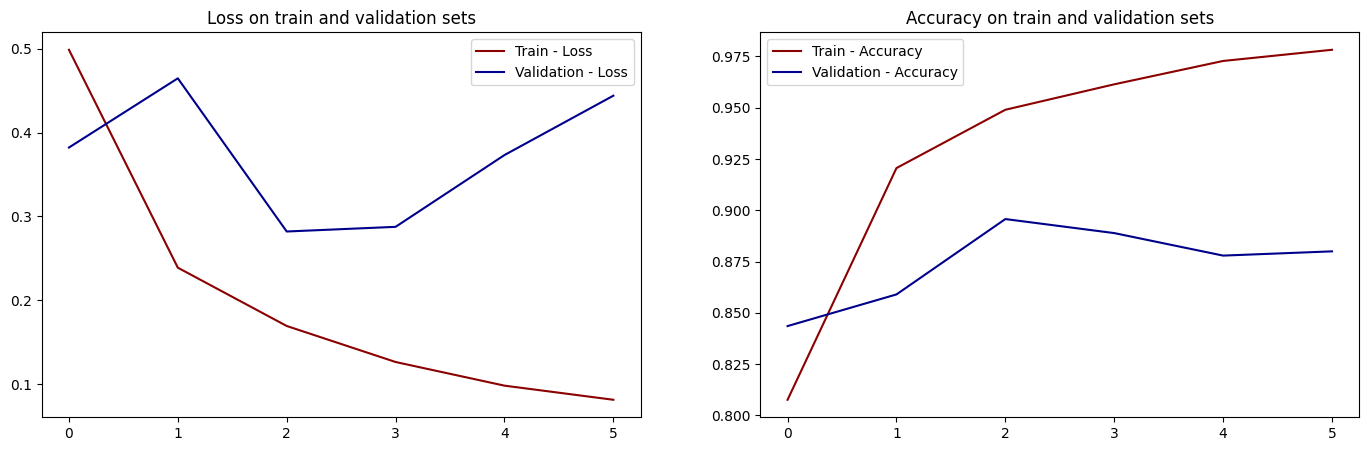

In [162]:
# Plot below your train/val loss history
def plot_history(history):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (17, 5))
    
    axes[0].plot(history.history['loss'], color = 'darkred', label = 'Train - Loss')
    axes[0].plot(history.history['val_loss'], color = 'darkblue', label = 'Validation - Loss')
    axes[0].legend()
    axes[0].set_title('Loss on train and validation sets')    
    
    axes[1].plot(history.history['accuracy'], color = 'darkred', label = 'Train - Accuracy')
    axes[1].plot(history.history['val_accuracy'], color = 'darkblue', label = 'Validation - Accuracy')
    axes[1].legend()
    axes[1].set_title('Accuracy on train and validation sets')


plot_history(history)


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
fig.savefig("tests/historyRNN.png")

❓ **Evaluate your performances on test set**
- Store your test score as `score_test`

In [163]:
score_test = model.evaluate(X_test,y_test)[1]
score_test

281/281 [==============================] - 10s 35ms/step - loss: 0.2792 - accuracy: 0.8962


0.8961602449417114

#### 💾 Save your results

Run the cell below to save your results.

In [164]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "rnn",
    input_shape = list(model.input.shape),
    output_shape = list(model.output.shape),
    layer_names = [layer.name for layer in model.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in model.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()